In [1]:
fcounts <- read.csv("filtered.counts.csv", header = TRUE, row.names = 1, sep = "\t")

In [2]:
fcounts[1:3,]

,B14.5.new.bam,B15.5.new.bam,B17.5.new.bam,B20.new.bam,B34.new.bam,C14.5.new.bam,C15.5.new.bam,C17.5.new.bam,C20.new.bam,C34.new.bam
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
MSTRG.1,0,0,0,1,0,0,0,0,1,0
MSTRG.2,12,10,28,16,15,11,13,18,18,6
MSTRG.8,2,3,22,13,39,0,4,3,5,6


In [3]:
name <- c("B14.5", "B15.5", "B17.5", "B20", "B34", "C14.5", "C15.5", "C17.5", "C20", "C34")
tissue <- c("B", "B", "B", "B", "B", "C", "C", "C", "C", "C")
age <- c(14.5, 15.5, 17.5, 20, 34, 14.5, 15.5, 17.5, 20, 34)
col <- c("black", "black", "black", "black", "black", "green", "green", "green", "green", "green")

In [4]:
df <- data.frame(Tissue=tissue, Age=age, Col=col)
rownames(df)<- c("B14.5", "B15.5", "B17.5", "B20", "B34", "C14.5", "C15.5", "C17.5", "C20", "C34")
df

,Tissue,Age,Col
,<chr>,<dbl>,<chr>
B14.5,B,14.5,black
B15.5,B,15.5,black
B17.5,B,17.5,black
B20,B,20.0,black
B34,B,34.0,black
C14.5,C,14.5,green
C15.5,C,15.5,green
C17.5,C,17.5,green
C20,C,20.0,green


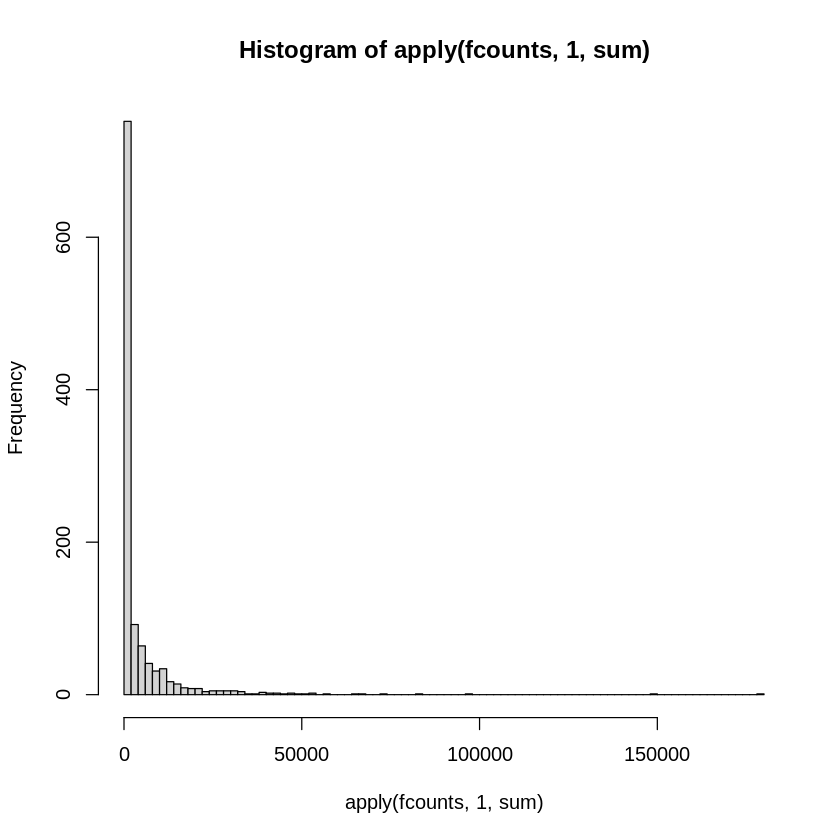

In [5]:
hist(apply(fcounts,1,sum),100) #распределение суммы ридов среди всех образцов для несколльких генов

In [6]:
topcounts = fcounts[apply(fcounts,1,sum)>9,]

In [8]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("edgeR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)

Installing package(s) 'BiocVersion', 'edgeR'

also installing the dependencies ‘limma’, ‘locfit’, ‘Rcpp’


Old packages: 'IRkernel', 'bslib', 'callr', 'data.table', 'devtools', 'digest',
  'ggplot2', 'jsonlite', 'lubridate', 'openssl', 'pkgload', 'processx', 'ps',
  'roxygen2', 'sys', 'tibble', 'tidyverse', 'vctrs', 'xfun', 'yaml', 'zip',
  'foreign', 'mgcv', 'rpart'



In [9]:
library(edgeR) 

Loading required package: limma



In [10]:
edger = DGEList(topcounts) 
edger = calcNormFactors(edger,method='RLE') 
edger$samples # norm.factors are close to 1

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
B14.5.new.bam,1,492282,1.0295871
B15.5.new.bam,1,470273,1.0524101
B17.5.new.bam,1,464830,1.0381510
B20.new.bam,1,483774,1.0189131
B34.new.bam,1,497073,0.8954590
C14.5.new.bam,1,484798,1.0131586
C15.5.new.bam,1,464900,1.0478469
C17.5.new.bam,1,500373,0.9530386
C20.new.bam,1,499308,1.0419757


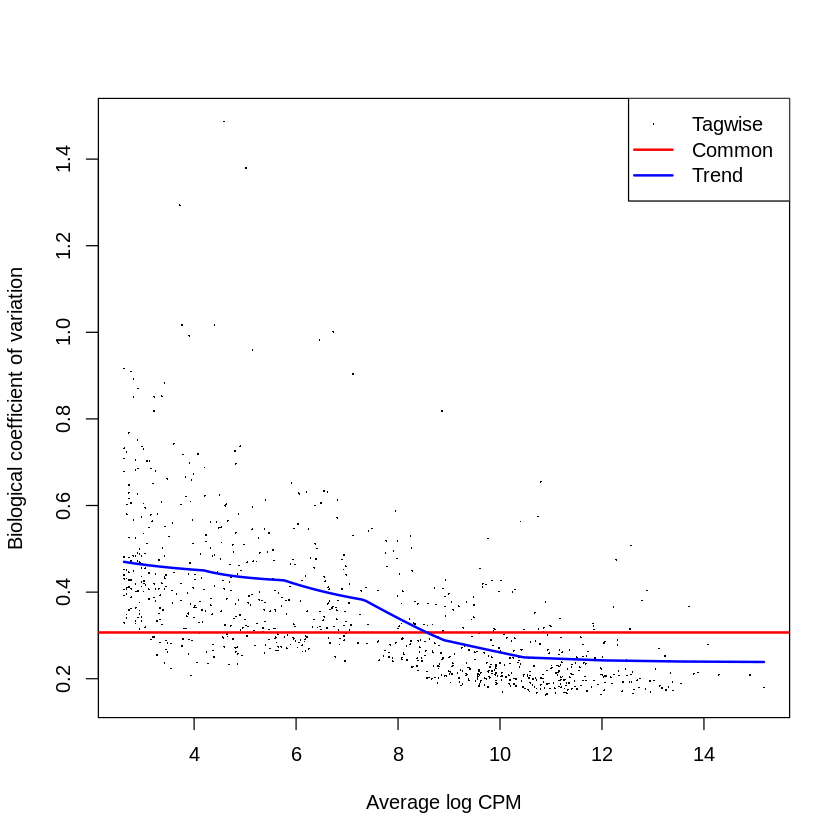

In [50]:
design = model.matrix(~ tissue + age,data = df)
edger = estimateDisp(edger,design) 
plotBCV(edger)

In [14]:
fit <- glmFit(edger,design)
design

,(Intercept),tissueC,age,tissueC:age
B14.5,1,0,14.5,0.0
B15.5,1,0,15.5,0.0
B17.5,1,0,17.5,0.0
B20,1,0,20.0,0.0
B34,1,0,34.0,0.0
C14.5,1,1,14.5,14.5
C15.5,1,1,15.5,15.5
C17.5,1,1,17.5,17.5
C20,1,1,20.0,20.0
C34,1,1,34.0,34.0


In [19]:
Tissue = glmLRT(fit,2)
Age = glmLRT(fit,3)
Tissue_age = glmLRT(fit,4)

In [25]:
ttTissue = topTags(Tissue, adjust.method="BH", sort.by="logFC", p.value=0.05)

In [26]:
ttTissue

,logFC,logCPM,LR,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MSTRG.838,-9.013093,3.215395,12.55158,3.958708e-04,3.507416e-02
MSTRG.346,5.001984,6.199669,12.61722,3.822103e-04,3.507416e-02
MSTRG.1042,-4.964353,7.369077,12.61681,3.822935e-04,3.507416e-02
MSTRG.967,-4.151513,7.786354,15.05757,1.042811e-04,1.319901e-02
MSTRG.961,-3.489146,6.185317,16.56313,4.705699e-05,8.338499e-03
MSTRG.952,-3.367345,7.116269,12.23140,4.699182e-04,3.784977e-02
MSTRG.109,3.177711,7.987511,17.71284,2.568862e-05,7.483472e-03
MSTRG.1013,3.103973,10.599136,38.07266,6.815856e-10,6.038848e-07
MSTRG.160,-2.415550,10.684910,19.34062,1.093548e-05,4.844420e-03


In [27]:
ttTissue_age = topTags(Tissue_age, adjust.method="BH", sort.by="logFC", p.value=0.05) 
# сделаем поправку на множественное тестирование, сортировка по logFC, установленное значение pvalue=0.05

In [22]:
ttTissue_age

,logFC,logCPM,LR,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000099398,-0.8530563,3.244491,12.24003,4.677512e-04,3.303032e-02
MSTRG.777,0.4855443,2.811647,11.33320,7.613376e-04,4.496968e-02
MSTRG.838,0.4243032,3.215395,12.51417,4.038782e-04,3.253056e-02
MSTRG.946,-0.3122361,4.398043,14.14207,1.695105e-04,1.877329e-02
MSTRG.346,-0.2608930,6.199669,14.93504,1.112767e-04,1.408445e-02
MSTRG.109,-0.2089647,7.987511,34.64314,3.960326e-09,3.078710e-06
MSTRG.952,0.1898041,7.116269,17.32580,3.148827e-05,5.579722e-03
MSTRG.961,0.1566896,6.185317,16.86585,4.011698e-05,5.923941e-03
MSTRG.256,0.1546271,7.972825,12.17384,4.846435e-04,3.303032e-02


межтканевые отличия должны быть не менее чем в два раза
это мы вижим по колонке logFC в таблице ttTissue
межвозрастные и тканевые отличия не такие значимые
logFC должен быть >=1

In [28]:
cpm = cpm(edger)

нарисуем графики для пары генов из ttTissue ради интереса

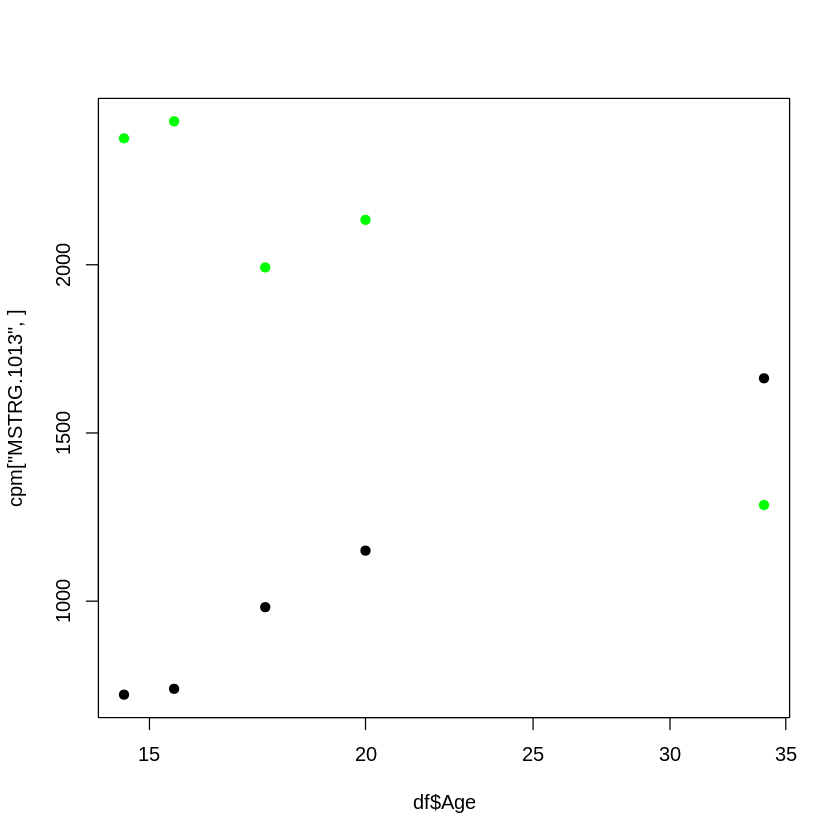

In [31]:
plot(df$Age,cpm['MSTRG.1013',],pch=19,col=df$Col,log='x')
#экспрессия растет в коре и убывает в мозжечке

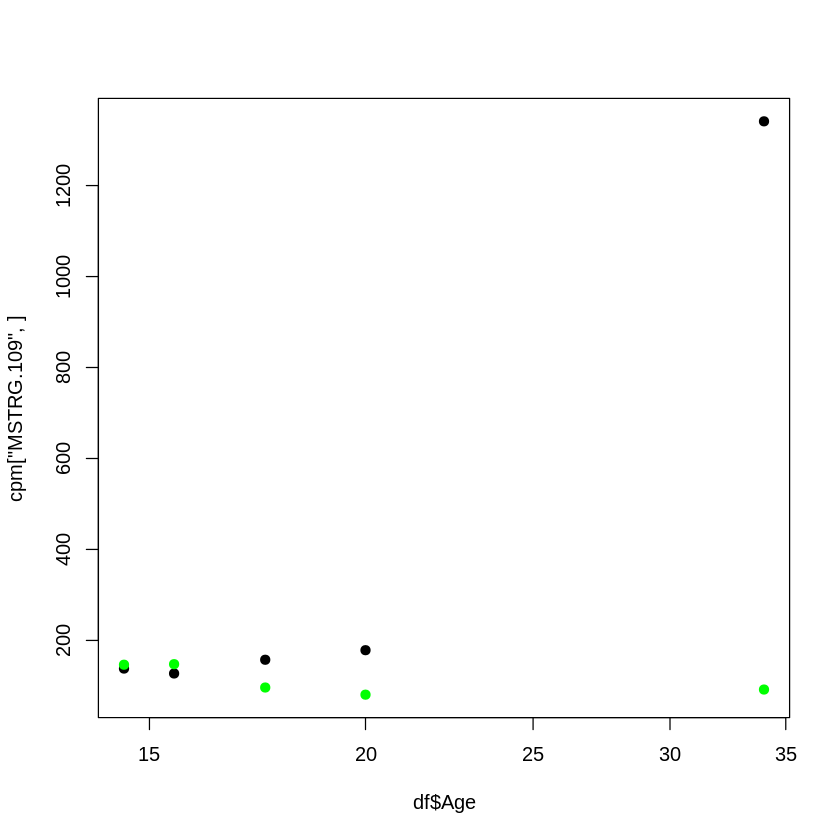

In [32]:
plot(df$Age,cpm['MSTRG.109',],pch=19,col=df$Col,log='x')
#экспрессия значительно растет в коре и практически не изменяется в мохжечке

Скалстеризуйте гены значимые хотя бы по одному фактору при помощи
иерархической кластеризации (расстояние 1 — коэффициент корреляции
Спирмана) в 6 кластеров.

In [34]:
Tpv = glmLRT(fit,2)$table$PValue
Apv = glmLRT(fit,3)$table$PValue
TApv = glmLRT(fit,4)$table$PValue

In [35]:
pv <- data.frame(tissue=Tpv, age=Apv, tissue_age=TApv)
rownames(pv) = rownames(topcounts)
head(pv)

,tissue,age,tissue_age
,<dbl>,<dbl>,<dbl>
MSTRG.2,0.4759347,0.8035947,0.3098264
MSTRG.8,0.8045225,0.0109128,0.4977260
MSTRG.9,0.6152315,0.7459328,0.5621959
MSTRG.10,0.7127994,0.9566278,0.2416614
MSTRG.11,0.2351300,0.4612959,0.2028396
MSTRG.12,0.5498793,0.3748042,0.5379084


In [36]:
qv = apply(pv,2,p.adjust,m='BH')

In [37]:
sign = cpm[apply(qv,1,min)<0.05,] 


In [38]:
zsign = t(scale(t(sign))) 


In [39]:
clusters <- hclust(as.dist(1-cor(t(zsign)))) 


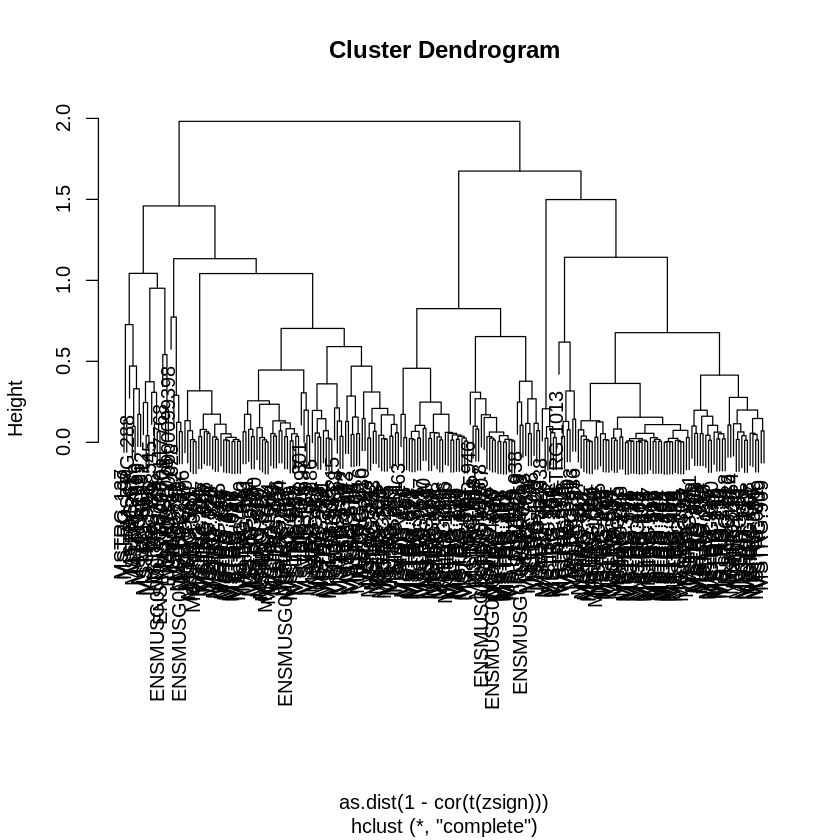

In [40]:
plot(clusters)

In [41]:
sclusters <- cutree(clusters,6)

In [42]:
table(sclusters)

sclusters
 1  2  3  4  5  6 
51 83 68 17  6  7 

Нарисуйте для каждого кластера зависимость среднего z-score от возраста для обоих тканей

In [43]:
clusterplot <- function(a1){
  means = apply(zsign[sclusters==a1,,drop=F],2,mean)  # средние экспресси для данного кластера
plot(df$Age,means,pch=19,col=df$Col,main=paste0('cluster', a1, ' (',sum(sclusters==a1),')'),log='x',cex=2) # рисуем средние занчения
for(t in unique(df$Tissue)){  # перебираем ткани 
  f = df$Tissue == t # отбираем образцы относящиеся к данной ткани
  ss = smooth.spline(df$Age[f],means[f],df=4) # апроксимируем зависимость сплайном
  ss = predict(ss,seq(min(df$Age),max(df$Age),length.out=100)) # интерполируем
  lines(ss,lwd=3,col=df$Col[f][1]) # рисуем апроксимацию
}
}

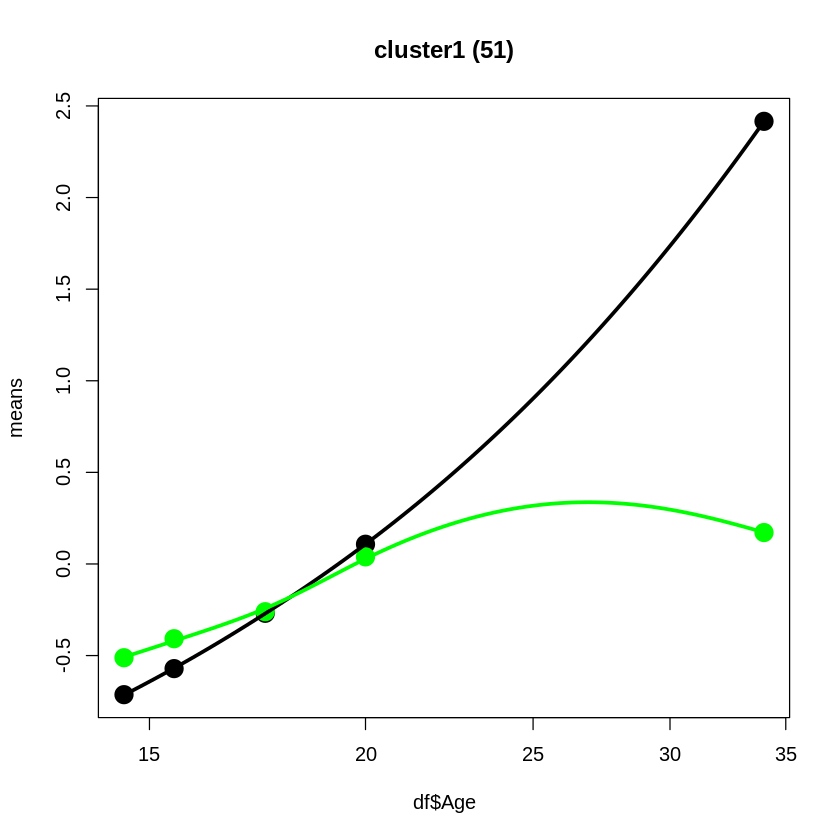

In [44]:
clusterplot(1)

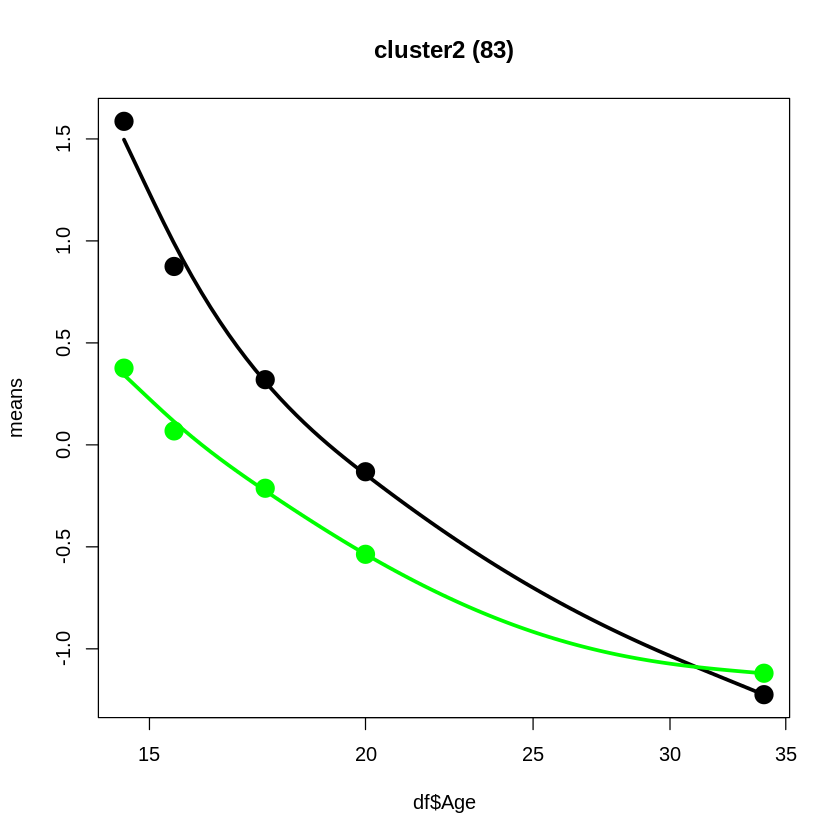

In [45]:
clusterplot(2)

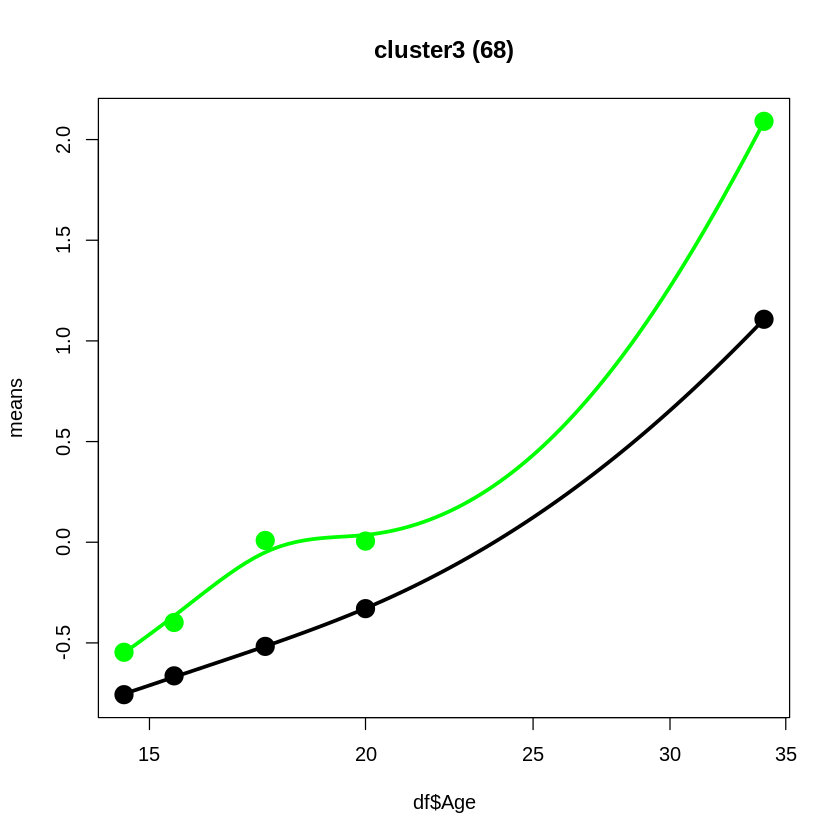

In [46]:
clusterplot(3)

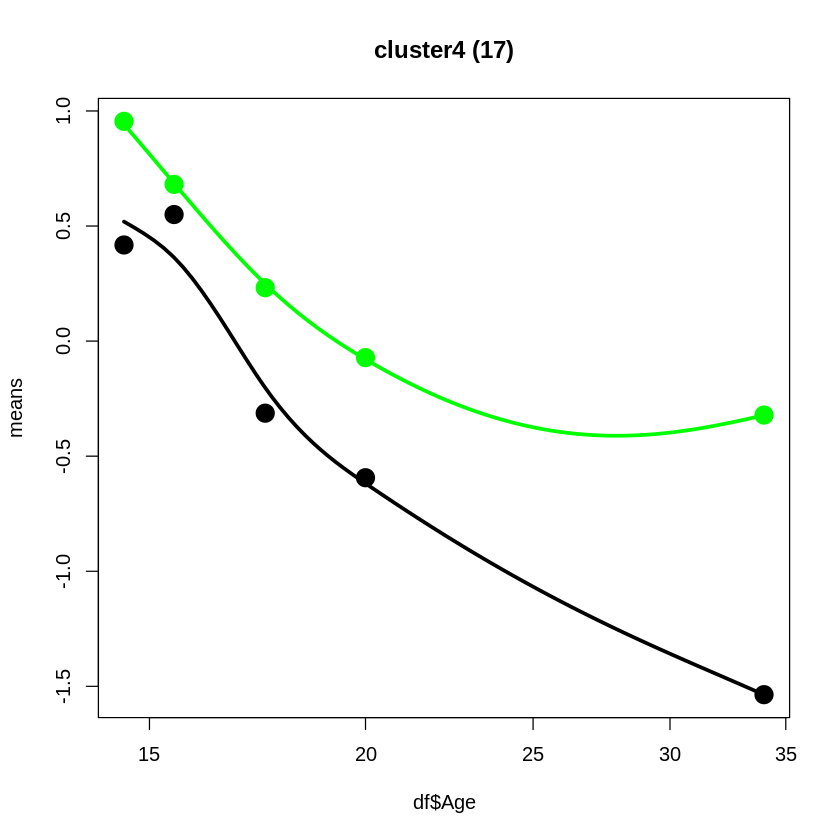

In [47]:
clusterplot(4)

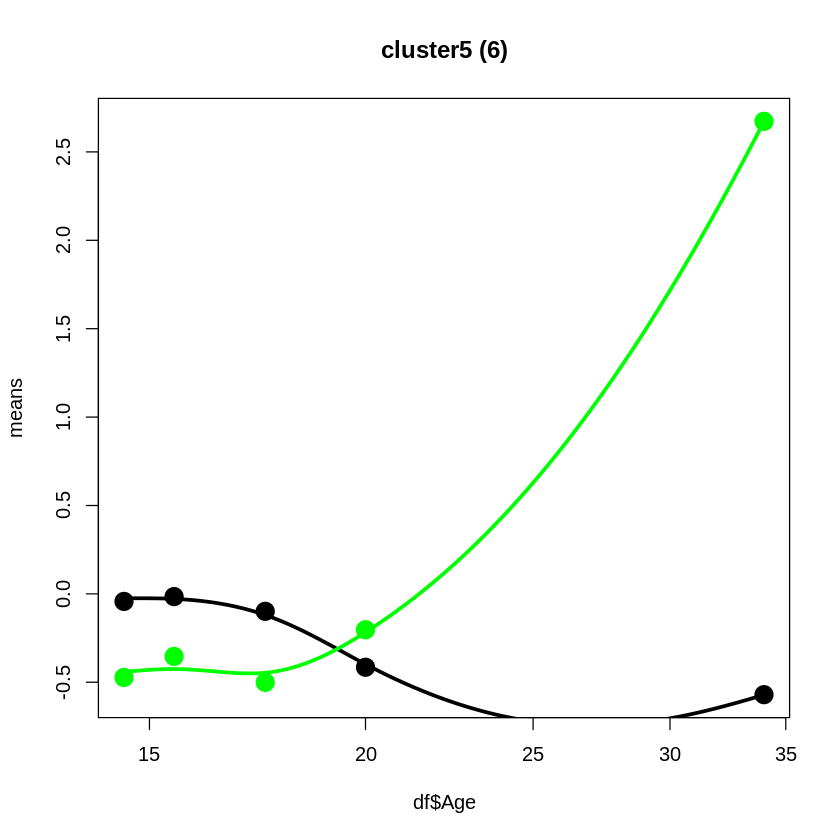

In [48]:
clusterplot(5)

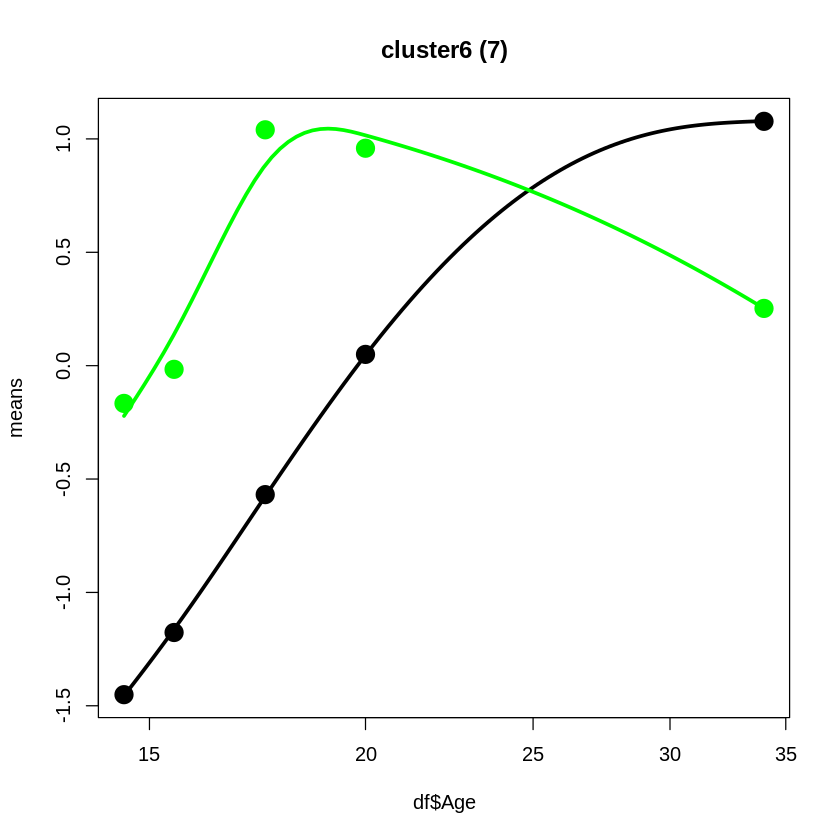

In [49]:
clusterplot(6)